In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

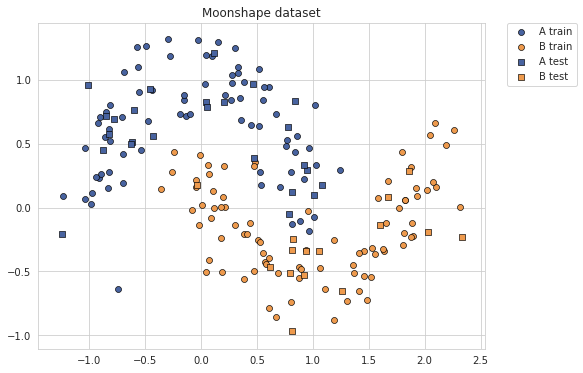

In [2]:
X,y = datasets.make_moons(n_samples=200, noise=0.2, random_state=7)
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=7,test_size=1/5)

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)

plt.title("Moonshape dataset")
plt.show()

In [3]:
input_size = 2
hidden_size = 16
output_size = 1
num_epochs = 1000
learning_rate = 0.008

In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, output_size),
    torch.nn.Sigmoid())

loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)    
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): Sigmoid()
)


In [5]:
ACC,LOSS = [],[]

labels = torch.from_numpy(train_y).float().reshape(-1, 1)
for epoch in range(num_epochs):
    
    inputs = torch.from_numpy(train_x).float()
    predict = model(inputs)
    
    loss = loss_func(predict, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    predict_label = np.where(predict.detach().numpy() < 0.5, 0, 1)
    accuracy = np.sum(train_y.reshape(-1,1) == predict_label) / len(train_y)
    
    ACC.append(accuracy)
    LOSS.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}, Acc: {:.2f}' 
                   .format(epoch+1, num_epochs, loss.item(), accuracy))
        
X_test_t = torch.from_numpy(test_x).float()
y_hat_test = model(X_test_t)

y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
test_accuracy = np.sum(test_y.reshape(-1,1)==y_hat_test_class) / len(test_y)
print("\nTest Accuracy {:.2f}".format(test_accuracy))

Epoch [100/1000], Loss: 0.0851, Acc: 0.86
Epoch [200/1000], Loss: 0.0438, Acc: 0.95
Epoch [300/1000], Loss: 0.0293, Acc: 0.97
Epoch [400/1000], Loss: 0.0249, Acc: 0.97
Epoch [500/1000], Loss: 0.0225, Acc: 0.97
Epoch [600/1000], Loss: 0.0209, Acc: 0.98
Epoch [700/1000], Loss: 0.0190, Acc: 0.98
Epoch [800/1000], Loss: 0.0179, Acc: 0.98
Epoch [900/1000], Loss: 0.0170, Acc: 0.98
Epoch [1000/1000], Loss: 0.0163, Acc: 0.98

Test Accuracy 1.00


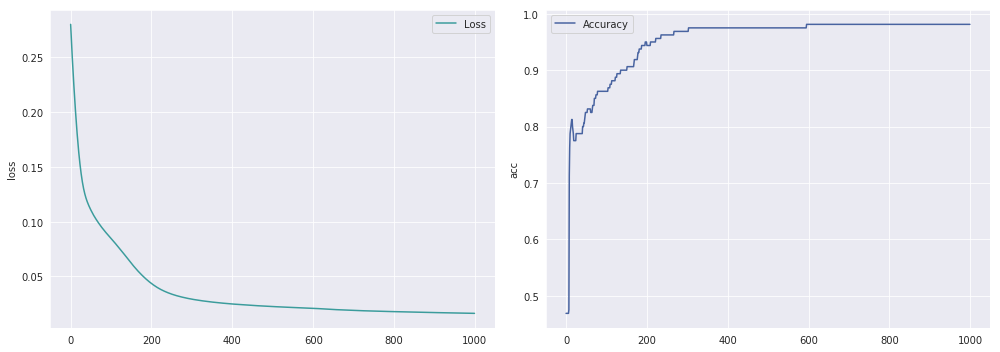

In [6]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(LOSS, label="Loss", color="#3B9C9C")
ax[0].set_ylabel('loss')
ax[0].legend(loc="upper right")

ax[1].plot(ACC, label="Accuracy", color="#4863A0")
ax[1].set_ylabel('acc')
ax[1].legend(loc="upper left")

plt.tight_layout()
plt.show()

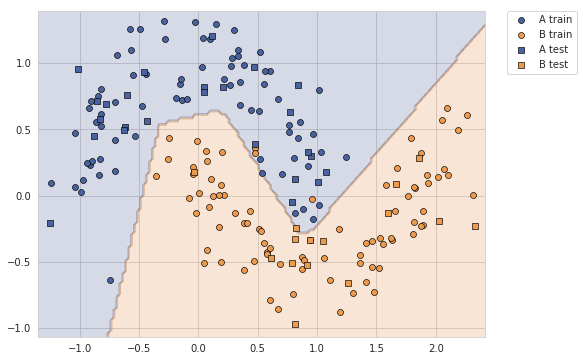

Test Accuracy 1.00


In [7]:
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
grid = min(x_max - x_min, y_max - y_min) / 100

XX, YY = np.meshgrid(np.arange(x_min, x_max, grid), np.arange(y_min, y_max, grid))
meshgrid_ = np.hstack((XX.ravel().reshape(-1,1), YY.ravel().reshape(-1,1)))

meshgrid_features = torch.from_numpy(meshgrid_).float()
meshgrid_colors = model(meshgrid_features)

clf = np.where(meshgrid_colors < 0.5,0,1)
ZZ = clf.reshape(XX.shape)

sns.set_style("whitegrid")
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])

plt.figure(figsize=(8,6))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.24)
plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.show()

print("Test Accuracy {:.2f}".format(test_accuracy))